In [4]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\TheAncientOwl\\Code\\data-analysis-tool\\server\\test-data\\factor-analysis-bfi.csv')

df.drop(['Unnamed: 0', 'gender', 'education', 'age'], axis=1, inplace=True)
df.dropna(inplace=True)
print(df.columns)
# df.info()
df.head()

df.to_csv('C:\\Users\\TheAncientOwl\\Code\\data-analysis-tool\\server\\test-data\\factor-analysis.csv')


Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')


1. Bartlett's Test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

2. KMO Test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)

kmo_model

3. Default factor analysis - pick factors count

[5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902]


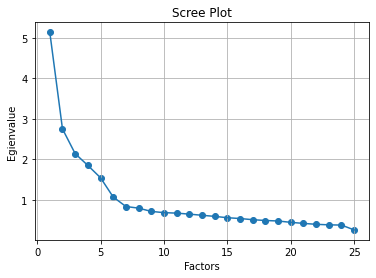

In [3]:
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit_transform(df)

# eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)

# screeplot
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Egienvalue')
plt.grid()
plt.show()

4. Factor analysis

In [ ]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

n_factors = 6
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit_transform(df)

print(pd.DataFrame(fa.loadings_, index=df.columns))



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loadings_matrix = pd.DataFrame(fa.loadings_,
                               index=df.columns,
                               columns=[f'F{x}' for x in range(1, n_factors + 1)])

plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(loadings_matrix, annot=True,
            vmax=1, vmin=-1, center=0,
            cmap=cmap)
plt.show()


Factor variance

In [ ]:
fa.get_factor_variance()

In [ ]:
import matplotlib.pyplot as plt

# pd.DataFrame(fa.get_communalities(), index=df.columns)

plt.bar(df.columns, height=fa.get_communalities())
plt.grid(axis='y')
